# House Prices Prediction

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
data = pd.read_csv('Raw_Housing_Prices.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [3]:
#descriptives of Sale_Price
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

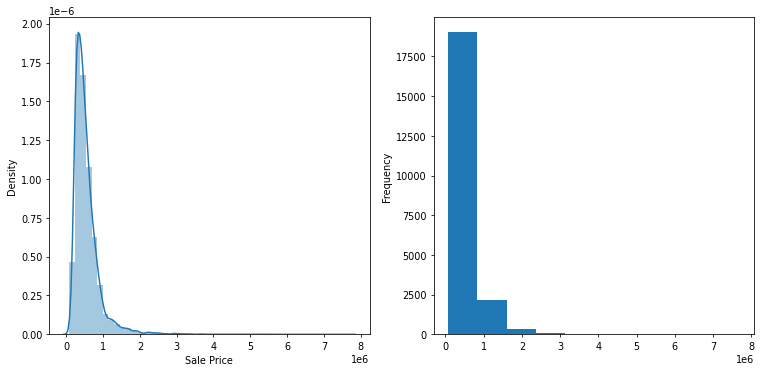

In [4]:
#distribution of target variable (Sale Price)
plt.figure(figsize = (13,6) , dpi = 70)
plt.subplot(1,2,1)
sns.distplot(data['Sale Price'])
plt.subplot(1,2,2)
data['Sale Price'].plot.hist()


It can be observed target variable is left skewed. And is not uniformally Distributed

# Treating Outliers

We will be using Quantiles to find upper_limit and lower_limit and replace the outliers with limits.


In [5]:
# checking quantiles
q1 = data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)
q1, q3

(321950.0, 645000.0)

In [6]:
#calculating iqr(inter quartile range)
iqr = q3 - q1
iqr

323050.0

In [7]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(1129575.0, -162625.0)

In [8]:
# imputing outliers
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [9]:
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

<AxesSubplot:ylabel='Frequency'>

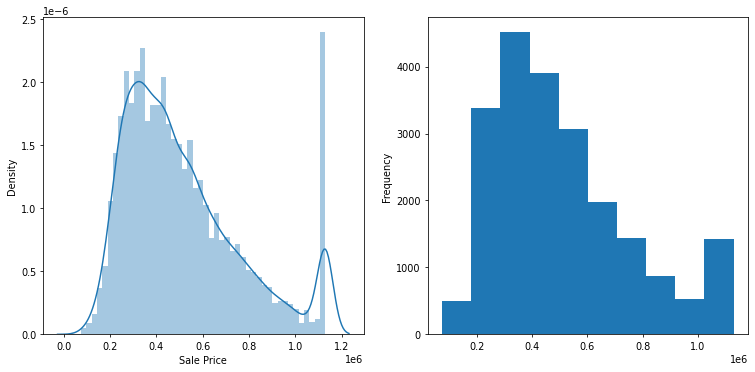

In [10]:
#distribution of target variable (Sale Price) after treating outliers
plt.figure(figsize = (13,6) , dpi = 70)
plt.subplot(1,2,1)
sns.distplot(data['Sale Price'])
plt.subplot(1,2,2)
data['Sale Price'].plot.hist()


Now ,Target Variable (Sale Price) is uniformly distributed.

# Treating Missing Values

In [11]:
#checking missing values
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

We can clearly see there are many missing values and we have to treat them. We will be treating numerical variables and categorical variables separately.

In [12]:
#we will be deleting all rows in which Sale Price is missing.
data.dropna(inplace=True , axis = 0 , subset=['Sale Price'])
data["Sale Price"].isnull().sum()

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [14]:
#separating numerical variables
numerical_columns = ['No of Bathrooms', 'Flat Area (in Sqft)','Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)','Latitude',
                     'Longitude','Living Area after Renovation (in Sqft)']

In [15]:
#using mean to fill the missing values we can also use median for the same.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [16]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

All numerical variables have been treated.

Only zipcode is left as it is more of a categorical variable and has to be treat (mean value doesn't make sense for a pincode).

In [17]:
data['Zipcode'].shape

(21609,)

In [18]:
column = data["Zipcode"].values.reshape(-1,1)
column.shape

(21609, 1)

In [19]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

# Other Transformations 

In [21]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [22]:
# converting from string to categorical
mapping = {'None' : "0",
           'Once' : '1',
           'Twice' : '2',
           'Thrice' : '3',
           'Four' : '4'}

data['No of Times Visited'] = data['No of Times Visited'].map(mapping)

In [23]:
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [24]:
# new variable creation that makes more sense
data['Ever Renovated'] = np.where(data['Renovated Year'] == 0, 'No', 'Yes')

In [25]:
#manipulating datetime variable
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

In [26]:
data['Years Since Renovation'] = np.where(data['Ever Renovated'] == 'Yes',
                                                     abs(data['Purchase Year'] - 
                                                        data['Renovated Year']), 0)

In [27]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


In [28]:
# dropping redundant variables
data.drop( columns = ['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)

In [29]:
data.head(30)

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0
5,7237550310,1129575.0,4,4.50,5420.0,101930.0,1.0,No,0,Fair,...,3890.0,1530,17,98053.0,47.6561,-122.005,4760.0,101930,No,0
6,1321400060,257500.0,3,2.25,1715.0,6819.0,2.0,No,0,Fair,...,1715.0,0,23,98003.0,47.3097,-122.327,2238.0,6819,No,0
7,2008000270,291850.0,3,1.50,1060.0,9711.0,1.0,No,0,Fair,...,1060.0,0,55,98198.0,47.4095,-122.315,1650.0,9711,No,0
8,2414600126,229500.0,3,1.00,1780.0,7470.0,1.0,No,0,Fair,...,1050.0,730,58,98146.0,47.5123,-122.337,1780.0,8113,No,0
9,3793500160,323000.0,3,2.50,1890.0,6560.0,2.0,No,0,Fair,...,1890.0,0,15,98038.0,47.3684,-122.031,2390.0,7570,No,0


In [30]:
#removing ID column
data.drop( columns = 'ID', inplace = True)

In [31]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


# Analyzing all categorical variables

<AxesSubplot:xlabel='Condition of the House'>

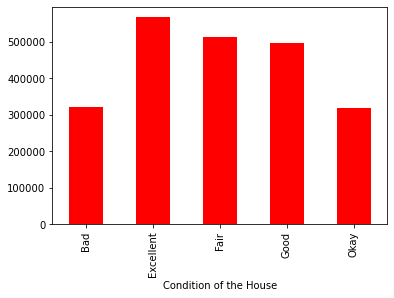

In [32]:
data.groupby('Condition of the House')['Sale Price'].mean().plot(kind = 'bar' , color = 'red')

<AxesSubplot:xlabel='Condition of the House'>

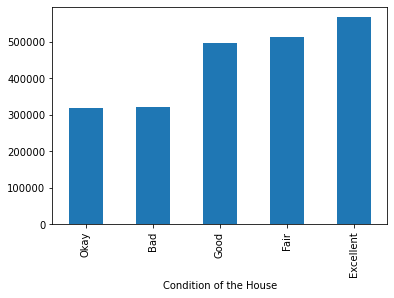

In [33]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Waterfront View'>

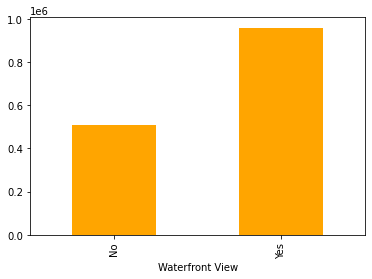

In [34]:
data.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind = 'bar' , color = 'orange')

<AxesSubplot:xlabel='Ever Renovated'>

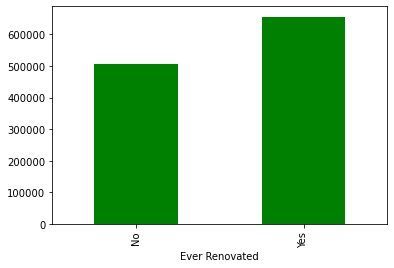

In [35]:
data.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind = 'bar' , color = 'green')

<AxesSubplot:xlabel='Zipcode'>

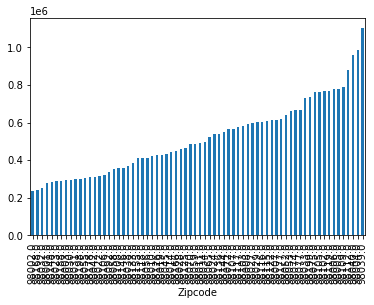

In [36]:
data.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind = 'bar')

In [37]:
data.dropna(inplace=True)
X = data.drop(columns=['Sale Price'])
Y = data['Sale Price']

# Numerical Variable Analysis

In [38]:
#checking distribution of independent numerical variables
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i])
    plt.title(i)

In [39]:
numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']

In [40]:
for i in numerical_columns:
  X[i] = pd.to_numeric(X[i])

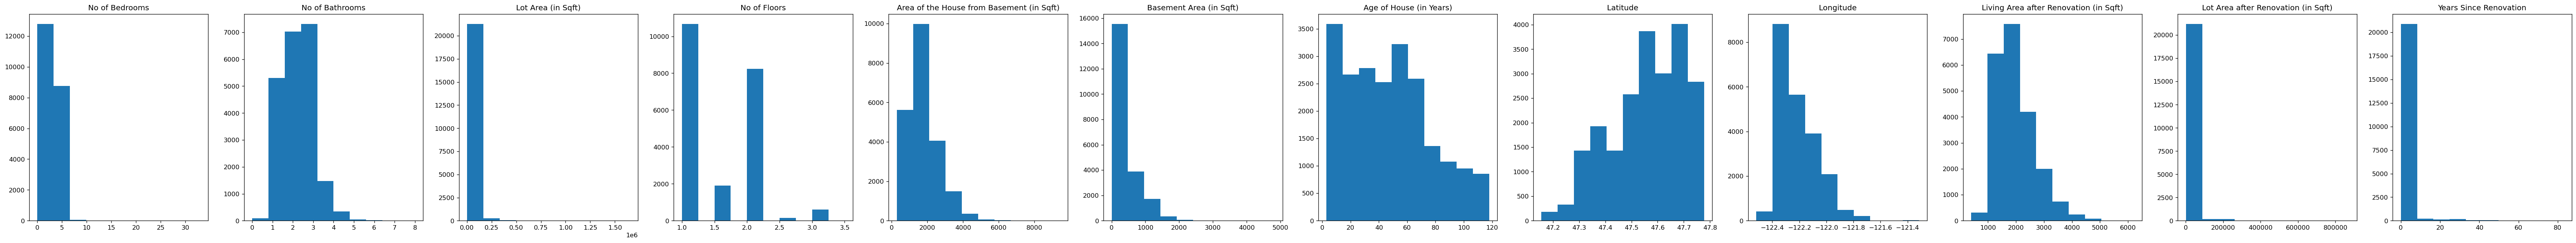

In [41]:
distribution(X, numerical_columns)

In [42]:
#removing right skew
def right_skew(x):
  return np.log(abs(x+500))

right_skew_variables = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']


In [43]:
for i in right_skew_variables:
  X[i] = X[i].map(right_skew)

# removing infinite values
X = X.replace(np.inf, np.nan)
X.dropna(inplace=True)

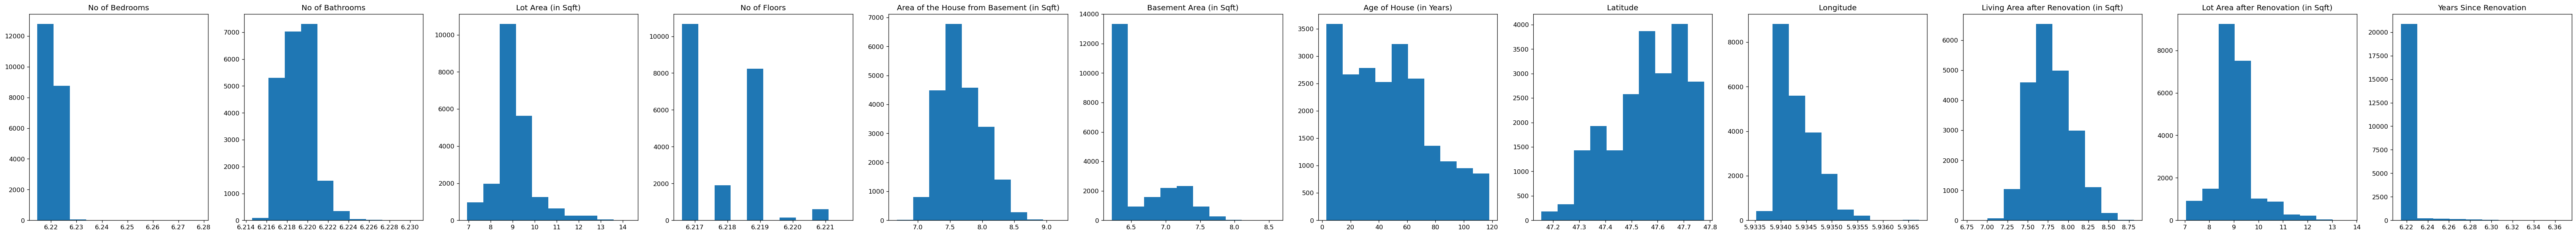

In [44]:
distribution(X, numerical_columns)

mapping categorical data to numerical data

In [45]:
X["Waterfront View"] = X["Waterfront View"].map({ 'No':0,
                                                 'Yes':1})


X['Condition of the House'] = X['Condition of the House'].map({'Bad':1,
                                                                'Okay':2,
                                                                 'Fair':3,
                                                                 'Good':4,
                                                                 'Excellent':5})

X['Ever Renovated'] = X['Ever Renovated'].map({'No':0,
                                               'Yes':1 })

X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,6.220590,6.216606,1180.0,8.724207,6.216606,0,0,3,7,7.426549,6.214608,63,98178.0,47.5112,5.934214,7.517521,8.724207,0,6.214608
1,6.220590,6.219098,2570.0,8.954415,6.218600,0,0,3,7,7.889834,6.802395,67,98125.0,47.7210,5.934050,7.691657,9.004423,1,6.265301
2,6.218600,6.216606,770.0,9.259131,6.216606,0,0,3,6,7.146772,6.214608,85,98028.0,47.7379,5.934278,8.077137,9.055089,0,6.214608
3,6.222576,6.220590,1960.0,8.612503,6.216606,0,0,5,7,7.346010,7.251345,53,98136.0,47.5208,5.933854,7.528332,8.612503,0,6.214608
4,6.220590,6.218600,1680.0,9.057189,6.216606,0,0,3,8,7.687080,6.214608,31,98074.0,47.6168,5.934775,7.740664,8.987572,0,6.214608


# Train Test Split

In [46]:
Y = data['Sale Price']

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 19), (6483, 19), (15126,), (6483,))

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [49]:
predictions = lr.predict(x_test)
predictions

array([ 600158.74885908,  666212.51913597,  472080.20637813, ...,
        809460.85039961,  961309.29107355, 1204979.02072111])

In [50]:
#score of our model
lr.score(x_test, y_test)

0.7558967117260719

# Training the Polynomial Regression model on the whole dataset

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression()

In [54]:
lin_reg_2.score(X_poly , Y)

0.8235283375335906

Score of Polynomial Linear Regression is better than Linear Regression

# Residuals

In [55]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [56]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

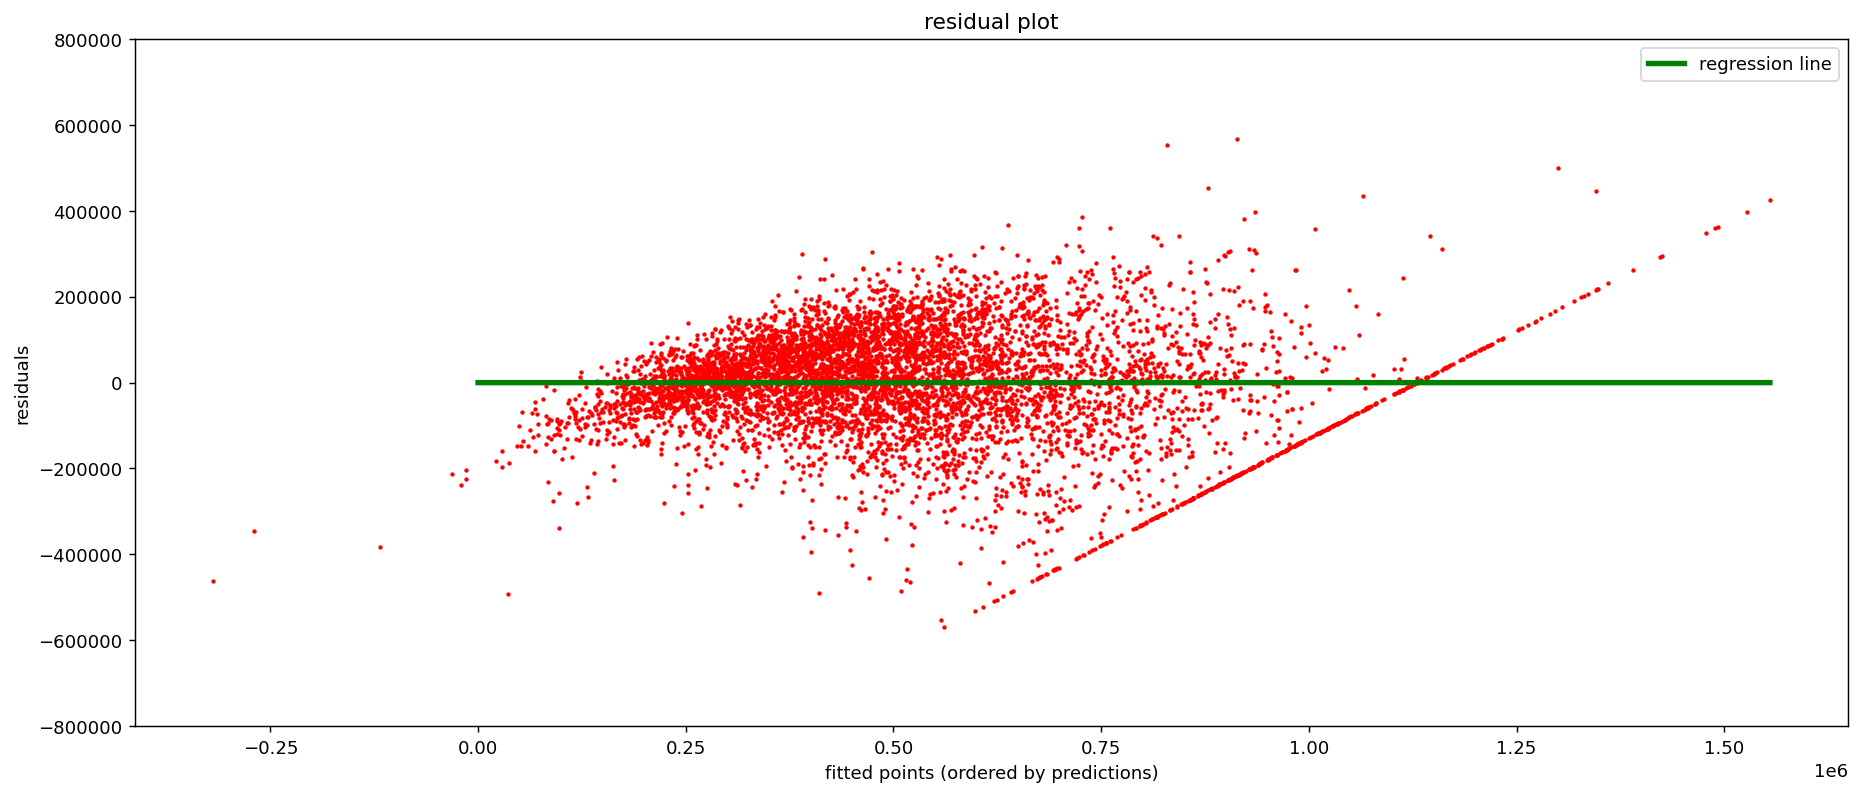

In [57]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

# Distribution of errors

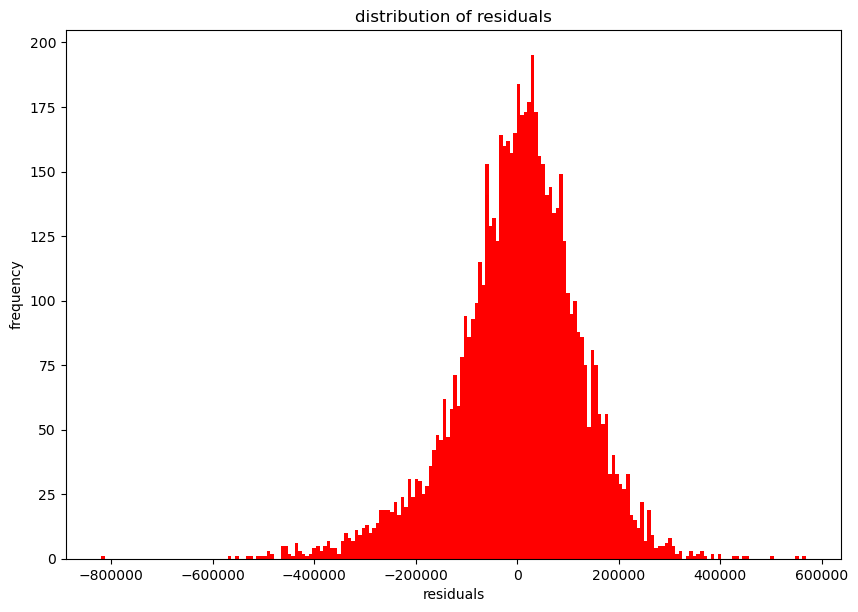

In [58]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

# By Pratham Bist
